### 파일 불러오기

In [4]:
import pandas as pd

surgery = pd.read_csv('/content/Patient_Surgery_Data.csv')

In [5]:
medical = pd.read_csv('/content/Medical_Image_Data_01.csv', encoding='euc-kr')

In [6]:
diagnosis = pd.read_csv('/content/Patient_Diagnosis_Data.csv')

### 하나의 Data로 합치기

In [7]:
merge_patient = pd.merge(surgery, diagnosis, how = 'left', left_on = '환자ID', right_on = '환자ID')

In [8]:
merge_patient

,환자ID,수술기법,수술시간,수술실패여부,수술일자,신장_x,연령_x,입원일자_x,재발여부,체중_x,퇴원일자_x,헤모글로빈수치_x,환자통증정도_x,통증기간(월)_x,혈액형,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,성별,스테로이드치료,신부전여부,신장_y,심혈관질환,암발병여부,연령_y,우울증여부,입원기간,입원일자_y,종양진행여부,직업,체중_y,퇴원일자_y,헤모글로빈수치_y,혈전합병증여부,환자통증정도_y,흡연여부,통증기간(월)_y
0,1PT,TELD,68.0,0,20190715,163,66,20190713,0,60.3,20190716,13.66,10,1.0,RH+A,22.8,3,51.0,0.0,0,0,0,0,0,0,2,1,0,163,0,0,66,0,2,20190713,0,자영업,60.3,20190716,13.66,0,10,0,1.0
1,2PT,TELD,31.0,0,20190716,171,47,20190715,0,71.7,20190716,13.73,10,1.0,RH+A,44.9,4,26.0,0.0,0,0,0,0,0,0,1,1,0,171,0,0,47,0,1,20190715,0,운동선수,71.7,20190716,13.73,0,10,0,1.0
2,3PT,TELD,78.0,0,20190731,178,39,20190729,0,77.1,20190801,15.34,7,1.0,RH+B,53.0,3,NaN,0.0,0,0,1,0,0,0,1,1,0,178,0,0,39,0,1,20190729,0,특수전문직,77.1,20190801,15.34,0,7,0,1.0
3,4PT,TELD,73.0,0,20190802,174,40,20190731,0,74.2,20190803,15.38,7,2.0,RH+O,54.7,4,18.0,0.0,0,1,0,0,0,0,1,0,0,174,0,0,40,0,1,20190731,0,주부,74.2,20190803,15.38,0,7,0,2.0
4,5PT,TELD,29.0,0,20190906,183,42,20190903,0,80.7,20190907,13.08,7,1.0,RH+A,53.8,4,NaN,0.0,0,1,0,0,0,0,1,1,0,183,0,0,42,0,2,20190903,0,특수전문직,80.7,20190907,13.08,0,7,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,NaN,80.0,0,20170407,157,59,20170407,0,64.0,20170408,13.60,7,12.0,RH+A,44.0,1,NaN,0.0,0,0,0,0,0,0,2,1,0,157,0,0,59,0,2,20170407,1,무직,64.0,20170408,13.60,0,7,0,12.0
1890,1891PT,NaN,20.0,0,20170427,157,42,20170426,0,59.0,20170429,13.00,7,6.0,RH+B,30.8,2,NaN,0.0,0,0,0,0,0,0,2,1,0,157,0,0,42,0,4,20170426,0,사무직,59.0,20170429,13.00,0,7,0,6.0
1891,1892PT,IELD,50.0,0,20170411,167,61,20170410,0,70.0,20170412,14.40,7,1.0,RH+O,36.7,3,NaN,0.0,0,0,0,0,1,0,1,1,0,167,0,0,61,0,3,20170410,0,무직,70.0,20170412,14.40,0,7,0,1.0
1892,1893PT,NaN,25.0,0,20170410,177,29,20170408,0,77.0,20170411,15.00,7,24.0,RH+A,32.5,2,NaN,0.0,0,0,0,0,0,0,1,1,0,177,0,0,29,0,4,20170408,0,사무직,77.0,20170411,15.00,0,7,0,24.0


In [9]:
patient = pd.merge(merge_patient, medical, how = 'left', left_on = '환자ID', right_on = '환자ID')

### 직업의 결측치 기타로 대체

In [14]:
df['직업'] = df['직업'].fillna('기타')

### ODI 결측치 삭제

In [15]:
df = df.drop(['ODI'], axis=1)

### 디스크 단면적 결측치 평균값으로 대체

In [16]:
medical['디스크단면적'] = medical['디스크단면적'].fillna(medical['디스크단면적'].mean)

### 연령 더미 변수화

In [23]:
test = pd.read_csv('/content/TestData.csv', encoding='euc-kr')
pd.set_option('display.max_columns', None)

In [24]:
test['경제활동구분']=0
test.loc[(test['연령'] > 30)&(test['연령'] <= 60),'경제활동구분'] = 1

### 직업군 더미 변수화

In [25]:
test['직업군']=0
test.loc[test['직업'] =='특수전문직','직업군']=1
test.loc[test['직업']=='운수업','직업군']=1
test.loc[test['직업']=='사무직','직업군']=1
test.loc[test['직업']=='공무원','직업군']=1
test.loc[test['직업']=='의료직','직업군']=1
test.loc[test['직업']=='학생','직업군']=1
test.loc[test['직업']=='예술가','직업군']=1
test.loc[test['직업']=='무직','직업군']=1

### 수술기법 결측치 그 외로 대체

In [26]:
test['수술기법']=test['수술기법'].replace('TELD',1).replace('IELD',2).replace('그 외',3)

### 통증기간 열 전체 삭제

In [29]:
df=df.drop(['통증기간(월)'],axis=1)

### 가족력 결측치 0으로 대체

In [30]:
df['가족력'] = df['가족력'].fillna('0')

### 헤모글로빈수치 결측치 평균값으로 대체

In [40]:
df['헤모글로빈수치']=df['헤모글로빈수치'].fillna(df['헤모글로빈수치'].mean())

### BMI column 추가

In [36]:
df['BMI']=round(df['체중']/((df['신장']*0.01)**2),1)

In [34]:
df

,Unnamed: 0,환자ID,수술기법,수술시간,수술실패여부,수술일자,신장_x,연령_x,입원일자_x,재발여부,체중_x,퇴원일자_x,헤모글로빈수치_x,환자통증정도_x,통증기간(월)_x,혈액형,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,성별,스테로이드치료,신부전여부,신장_y,심혈관질환,암발병여부,연령_y,우울증여부,입원기간,입원일자_y,종양진행여부,직업,체중_y,퇴원일자_y,헤모글로빈수치_y,혈전합병증여부,환자통증정도_y,흡연여부,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,연령대,경제활동구분
0,0,1PT,TELD,68.0,0,20190715,163,66,20190713,0,60.3,20190716,13.66,10,1.0,RH+A,22.8,3,0.0,0,0,0,0,0,0,2,1,0,163,0,0,66,0,2,20190713,0,자영업,60.3,20190716,13.66,0,10,0,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0,60,0
1,1,2PT,TELD,31.0,0,20190716,171,47,20190715,0,71.7,20190716,13.73,10,1.0,RH+A,44.9,4,0.0,0,0,0,0,0,0,1,1,0,171,0,0,47,0,1,20190715,0,운동선수,71.7,20190716,13.73,0,10,0,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0,40,0
2,2,3PT,TELD,78.0,0,20190731,178,39,20190729,0,77.1,20190801,15.34,7,1.0,RH+B,53.0,3,0.0,0,0,1,0,0,0,1,1,0,178,0,0,39,0,1,20190729,0,특수전문직,77.1,20190801,15.34,0,7,0,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0,30,0
3,3,4PT,TELD,73.0,0,20190802,174,40,20190731,0,74.2,20190803,15.38,7,2.0,RH+O,54.7,4,0.0,0,1,0,0,0,0,1,0,0,174,0,0,40,0,1,20190731,0,주부,74.2,20190803,15.38,0,7,0,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0,40,0
4,4,5PT,TELD,29.0,0,20190906,183,42,20190903,0,80.7,20190907,13.08,7,1.0,RH+A,53.8,4,0.0,0,1,0,0,0,0,1,1,0,183,0,0,42,0,2,20190903,0,특수전문직,80.7,20190907,13.08,0,7,0,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,NaN,80.0,0,20170407,157,59,20170407,0,64.0,20170408,13.60,7,12.0,RH+A,44.0,1,0.0,0,0,0,0,0,0,2,1,0,157,0,0,59,0,2,20170407,1,무직,64.0,20170408,13.60,0,7,0,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0,50,0
1890,1890,1891PT,NaN,20.0,0,20170427,157,42,20170426,0,59.0,20170429,13.00,7,6.0,RH+B,30.8,2,0.0,0,0,0,0,0,0,2,1,0,157,0,0,42,0,4,20170426,0,사무직,59.0,20170429,13.00,0,7,0,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0,40,0
1891,1891,1892PT,IELD,50.0,0,20170411,167,61,20170410,0,70.0,20170412,14.40,7,1.0,RH+O,36.7,3,0.0,0,0,0,0,1,0,1,1,0,167,0,0,61,0,3,20170410,0,무직,70.0,20170412,14.40,0,7,0,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0,60,0
1892,1892,1893PT,NaN,25.0,0,20170410,177,29,20170408,0,77.0,20170411,15.00,7,24.0,RH+A,32.5,2,0.0,0,0,0,0,0,0,1,1,0,177,0,0,29,0,4,20170408,0,사무직,77.0,20170411,15.00,0,7,0,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0,20,0


### 지방 축적도 상위 2개 값 삭제

In [41]:
# 이상치 처리
q1 = df['지방축적도'].quantile(0.25)
q3 = df['지방축적도'].quantile(0.75)
iqr = q3 - q1

condition1 = df['지방축적도'] < q1 - 1.5 * iqr
condition2 = df['지방축적도'] > q3 + 1.5 * iqr

a = df[condition1].index
b = df[condition2].index

df = df.drop([1715, 1308], axis = 0)

### Seg Angel 상위 3개 값 삭제

In [42]:
# 이상치 처리
q1 = df['Seg Angle(raw)'].quantile(0.25)
q3 = df['Seg Angle(raw)'].quantile(0.75)
iqr = q3 - q1

condition1 = df['Seg Angle(raw)'] < q1 - 1.5 * iqr
condition2 = df['Seg Angle(raw)'] > q3 + 1.5 * iqr

a = df[condition1].index
b = df[condition2].index

df = df.drop([64, 534, 1080], axis = 0)

### 지방축적도 결측치 중간값으로 대체

In [43]:
df['지방축적도'].fillna(df['지방축적도'].median(), inplace = True)

### Seg Angel 결측치 평균값으로 대체

In [44]:
df['Seg Angle(raw)'].fillna(df['Seg Angle(raw)'].mean(), inplace = True)

### PI / PT 결측치 포함 행 삭제

In [45]:
df = df.dropna(subset = ['PI', 'PT'], how = 'any', axis = 0)
df.info()
df_All = df
df_All.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 0 to 1893
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1885 non-null   int64  
 1   환자ID                    1885 non-null   object 
 2   수술기법                    1804 non-null   object 
 3   수술시간                    1832 non-null   float64
 4   수술실패여부                  1885 non-null   int64  
 5   수술일자                    1885 non-null   int64  
 6   신장_x                    1885 non-null   int64  
 7   연령_x                    1885 non-null   int64  
 8   입원일자_x                  1885 non-null   int64  
 9   재발여부                    1885 non-null   int64  
 10  체중_x                    1885 non-null   float64
 11  퇴원일자_x                  1885 non-null   int64  
 12  헤모글로빈수치_x               1885 non-null   float64
 13  환자통증정도_x                1885 non-null   int64  
 14  통증기간(월)_x               1881 non-null   

## 재발여부 머신러닝

In [46]:
import pandas as pd

test = pd.read_csv('/content/TestData.csv', encoding='euc-kr')
pd.set_option('display.max_columns', None)

In [47]:
# 데이터 프레임 및 연속형 자료 연산 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#통계 수치 계산 라이브러리 
from scipy import stats
from scipy.stats import variation

# 머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,r2_score

### 시각화 옵션

In [48]:
# 그래프 시각화 옵션 
%matplotlib inline

# 그래프의 한글 폰트를 설정 
mpl.rc('font', family = "Malgun Gothic") #맑은 고딕 설정 

#그래프의 한글을 더욱 선명하게 출력 
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'

#그래프에서 음수값이 나올때, 깨지는 현상 방지 
mpl.rc('axes', unicode_minus = False)

# 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 늘려줍니다.
pd.options.display.max_columns = 100

### Random Forest (MSE)

In [49]:
# 설명변수(Input) 데이터 형성 
X = test[['MF + ES', '가족력', '체중', '신장', 'BMI', '연령', '흡연여부', '과거수술횟수', 'Large Lymphocyte', '간질성폐질환', 
           '혈전합병증여부', '고혈압여부', '당뇨여부', '말초동맥질환여부', '빈혈여부', '스테로이드치료', '신부전여부', '심혈관질환', 
           '암발병여부', '종양진행여부', '헤모글로빈수치', '수술기법', '지방축적도', 'Instability', 'MF + ES', 
          'Modic change', 'PI', 'PT', '수술실패여부', '골밀도', '척추이동척도', '척추전방위증', '직업군']]
# 목표변수(Target) 데이터 형성 
Y = test[['재발여부']]

print(X.shape)
print(Y.shape)

(1860, 33)
(1860, 1)


In [50]:
# 데이터를 따로 분리하지 않고 예측 모델 생성 
X_train = X
Y_train = Y 

# MSE 모델,depth를 20으로, estimators를 100으로 설정 
model = RandomForestRegressor(criterion='mse',max_depth=20,min_samples_leaf=1, random_state=1000, n_estimators=100)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
print("Train Set Accuracy:",model.score(X_train, Y_train).round(2))
print('Train Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_pred).round(2))  
print('Train Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_pred).round(2))  
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)).round(2))  
print('Train Variance score: ', r2_score(Y_train,Y_pred).round(2))

C:\Users\YuJin\AppData\Local\Temp\ipykernel_10112\2014807339.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)
C:\Users\YuJin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Train Set Accuracy: 0.89
Train Mean Absolute Error: 0.06
Train Mean Squared Error: 0.01
Train Root Mean Squared Error: 0.11
Train Variance score:  0.89


중요인자 중요도순서:
# 1.: 지방축적도
# 2.: Large Lymphocyte
# 3.: Instability
# 4.: 신부전여부
# 5.: 수술실패여부
# 6.: 혈전합병증여부
# 7.: 헤모글로빈수치
# 8.: PT
# 9.: 스테로이드치료
# 10.: 골밀도
# 11.: MF + ES
# 12.: 가족력
# 13.: 체중
# 14.: PI
# 15.: 빈혈여부
# 16.: 간질성폐질환
# 17.: 척추전방위증
# 18.: 연령
# 19.: 종양진행여부
# 20.: MF + ES
# 21.: 수술기법
# 22.: BMI
# 23.: 심혈관질환
# 24.: 과거수술횟수
# 25.: 흡연여부
# 26.: 암발병여부
# 27.: Modic change
# 28.: 당뇨여부
# 29.: 신장
# 30.: 말초동맥질환여부
# 31.: 척추이동척도
# 32.: 직업군
# 33.: 고혈압여부


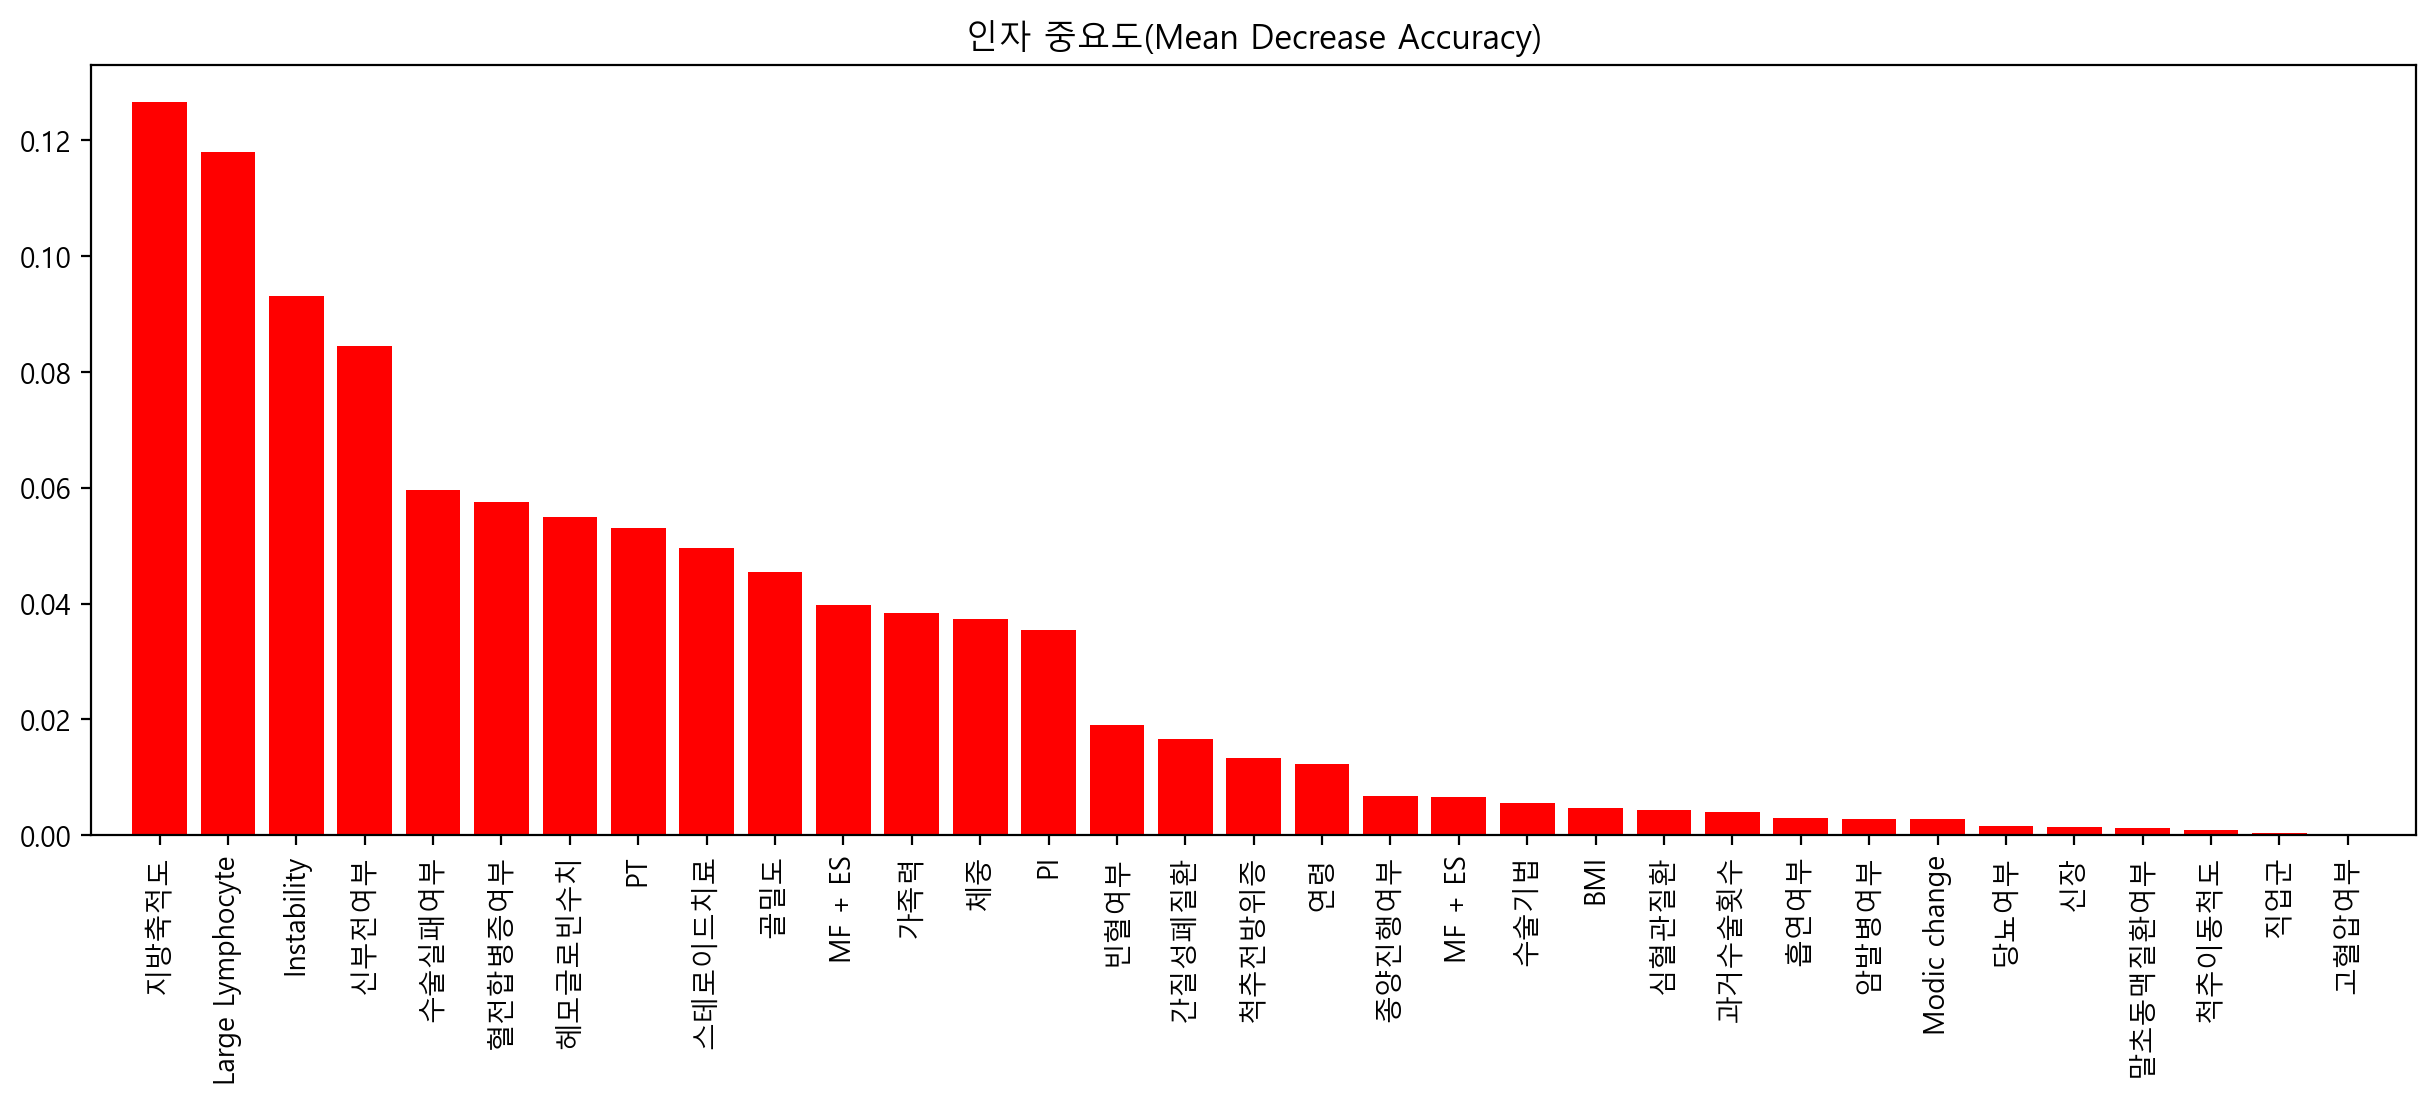

In [51]:
# 중요인자 순서도를 구하는 코드 
importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
feature_list = [X_train.columns[indices[f]] for f in range(X_train.shape[1])]
ff = np.array(feature_list)


print("중요인자 중요도순서:")

for f in range(X_train.shape[1]):
    print("# %d.: %s" % (f + 1,  ff[indices[f]]))


plt.figure(figsize=(15,5))
plt.title("인자 중요도(Mean Decrease Accuracy)")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), ff[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Gradient Boost Regressor

In [52]:
# 데이터를 따로 분리하지 않고 예측 모델 생성 
X_train = X
Y_train = Y

model = GradientBoostingRegressor(max_depth=3,min_samples_leaf=1, random_state=1000, n_estimators=100)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
print("Train Set Accuracy:",model.score(X_train, Y_train).round(2))
print('Train Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_pred).round(2))  
print('Train Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_pred).round(2))  
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)).round(2))  
print('Train Variance score: ', r2_score(Y_train,Y_pred).round(2))

C:\Users\YuJin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Set Accuracy: 0.59
Train Mean Absolute Error: 0.12
Train Mean Squared Error: 0.04
Train Root Mean Squared Error: 0.21
Train Variance score:  0.59


중요인자 중요도순서:
# 1.: 골밀도
# 2.: 지방축적도
# 3.: 척추전방위증
# 4.: 혈전합병증여부
# 5.: MF + ES
# 6.: 헤모글로빈수치
# 7.: 암발병여부
# 8.: 빈혈여부
# 9.: 흡연여부
# 10.: 가족력
# 11.: 당뇨여부
# 12.: 직업군
# 13.: 과거수술횟수
# 14.: Large Lymphocyte
# 15.: PI
# 16.: 스테로이드치료
# 17.: 종양진행여부
# 18.: BMI
# 19.: 심혈관질환
# 20.: MF + ES
# 21.: PT
# 22.: 신부전여부
# 23.: Instability
# 24.: 수술기법
# 25.: 체중
# 26.: Modic change
# 27.: 연령
# 28.: 신장
# 29.: 말초동맥질환여부
# 30.: 수술실패여부
# 31.: 간질성폐질환
# 32.: 고혈압여부
# 33.: 척추이동척도


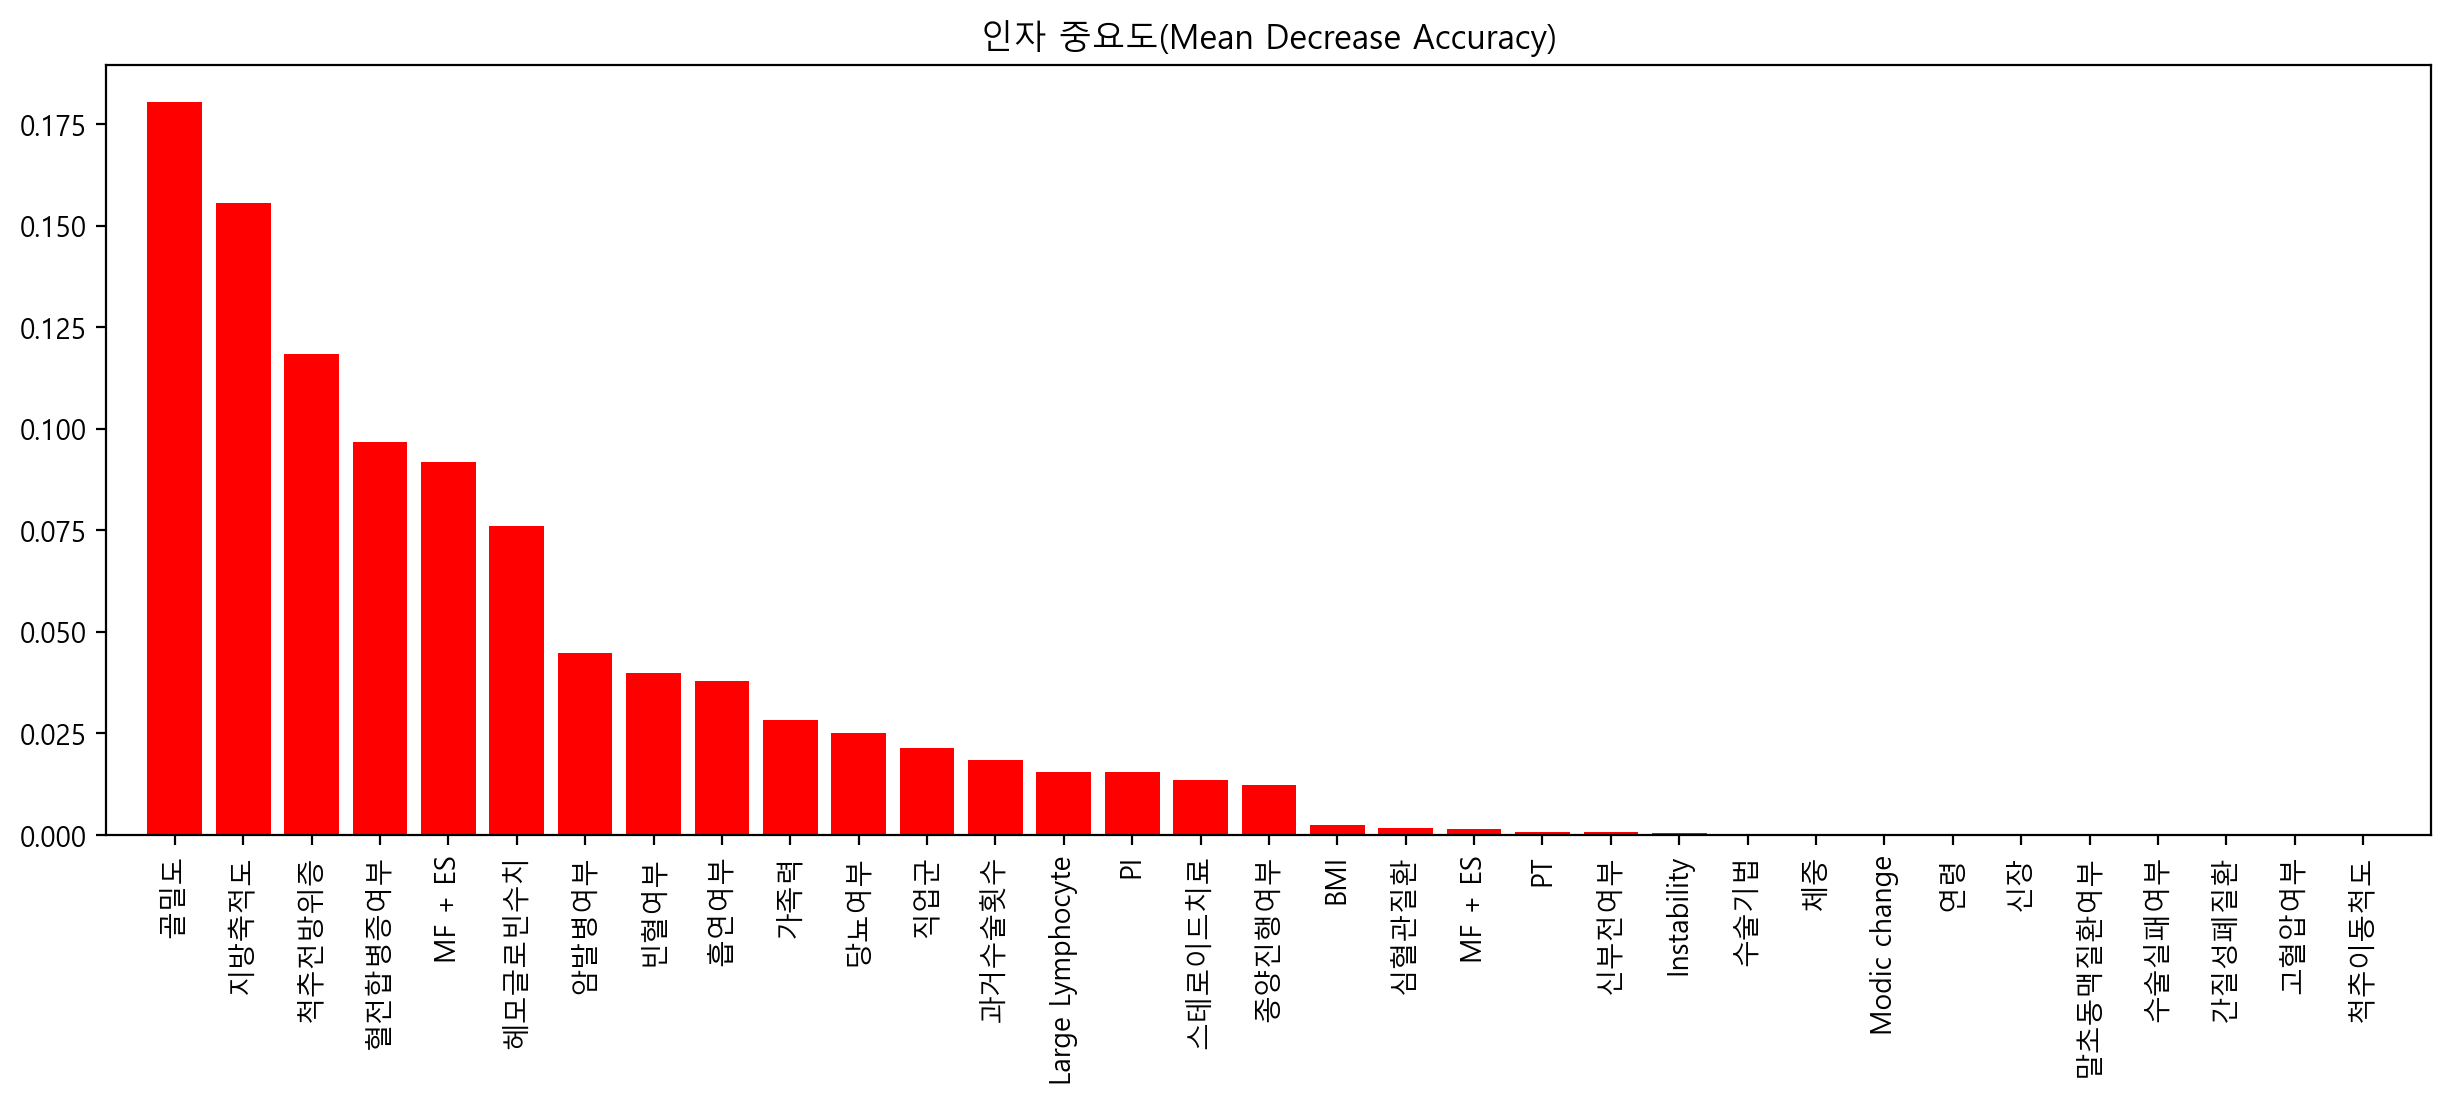

In [53]:
# 중요인자 순서도를 구하는 코드 
importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
feature_list = [X_train.columns[indices[f]] for f in range(X_train.shape[1])]
ff = np.array(feature_list)


print("중요인자 중요도순서:")

for f in range(X_train.shape[1]):
    print("# %d.: %s" % (f + 1,  ff[indices[f]]))


plt.figure(figsize=(15,5))
plt.title("인자 중요도(Mean Decrease Accuracy)")
plt.bar(range(X_train.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), ff[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

###  ExtraTreesRegressor

In [54]:
from sklearn.ensemble import ExtraTreesRegressor

In [55]:
# 데이터를 따로 분리하지 않고 예측 모델 생성 
X_train = X
Y_train = Y

model = ExtraTreesRegressor(max_depth=9,min_samples_leaf=1,n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)

print("Train Set Accuracy:",model.score(X_train, Y_train).round(2))
print('Train Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_pred).round(2))  
print('Train Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_pred).round(2))  
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)).round(2))  
print('Train Variance score: ', r2_score(Y_train,Y_pred).round(2))

C:\Users\YuJin\AppData\Local\Temp\ipykernel_10112\4112231586.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


Train Set Accuracy: 0.54
Train Mean Absolute Error: 0.12
Train Mean Squared Error: 0.05
Train Root Mean Squared Error: 0.22
Train Variance score:  0.54


중요인자 순서:
# 1.: 흡연여부
# 2.: 수술기법
# 3.: 신장
# 4.: PI
# 5.: Instability
# 6.: 혈전합병증여부
# 7.: BMI
# 8.: 골밀도
# 9.: 말초동맥질환여부
# 10.: 척추전방위증
# 11.: 가족력
# 12.: 지방축적도
# 13.: 간질성폐질환
# 14.: 수술실패여부
# 15.: 고혈압여부
# 16.: 종양진행여부
# 17.: 체중
# 18.: 신부전여부
# 19.: 연령
# 20.: 직업군
# 21.: Large Lymphocyte
# 22.: 척추이동척도
# 23.: PT
# 24.: MF + ES
# 25.: MF + ES
# 26.: 당뇨여부
# 27.: 심혈관질환
# 28.: 빈혈여부
# 29.: 헤모글로빈수치
# 30.: Modic change
# 31.: 암발병여부
# 32.: 과거수술횟수
# 33.: 스테로이드치료


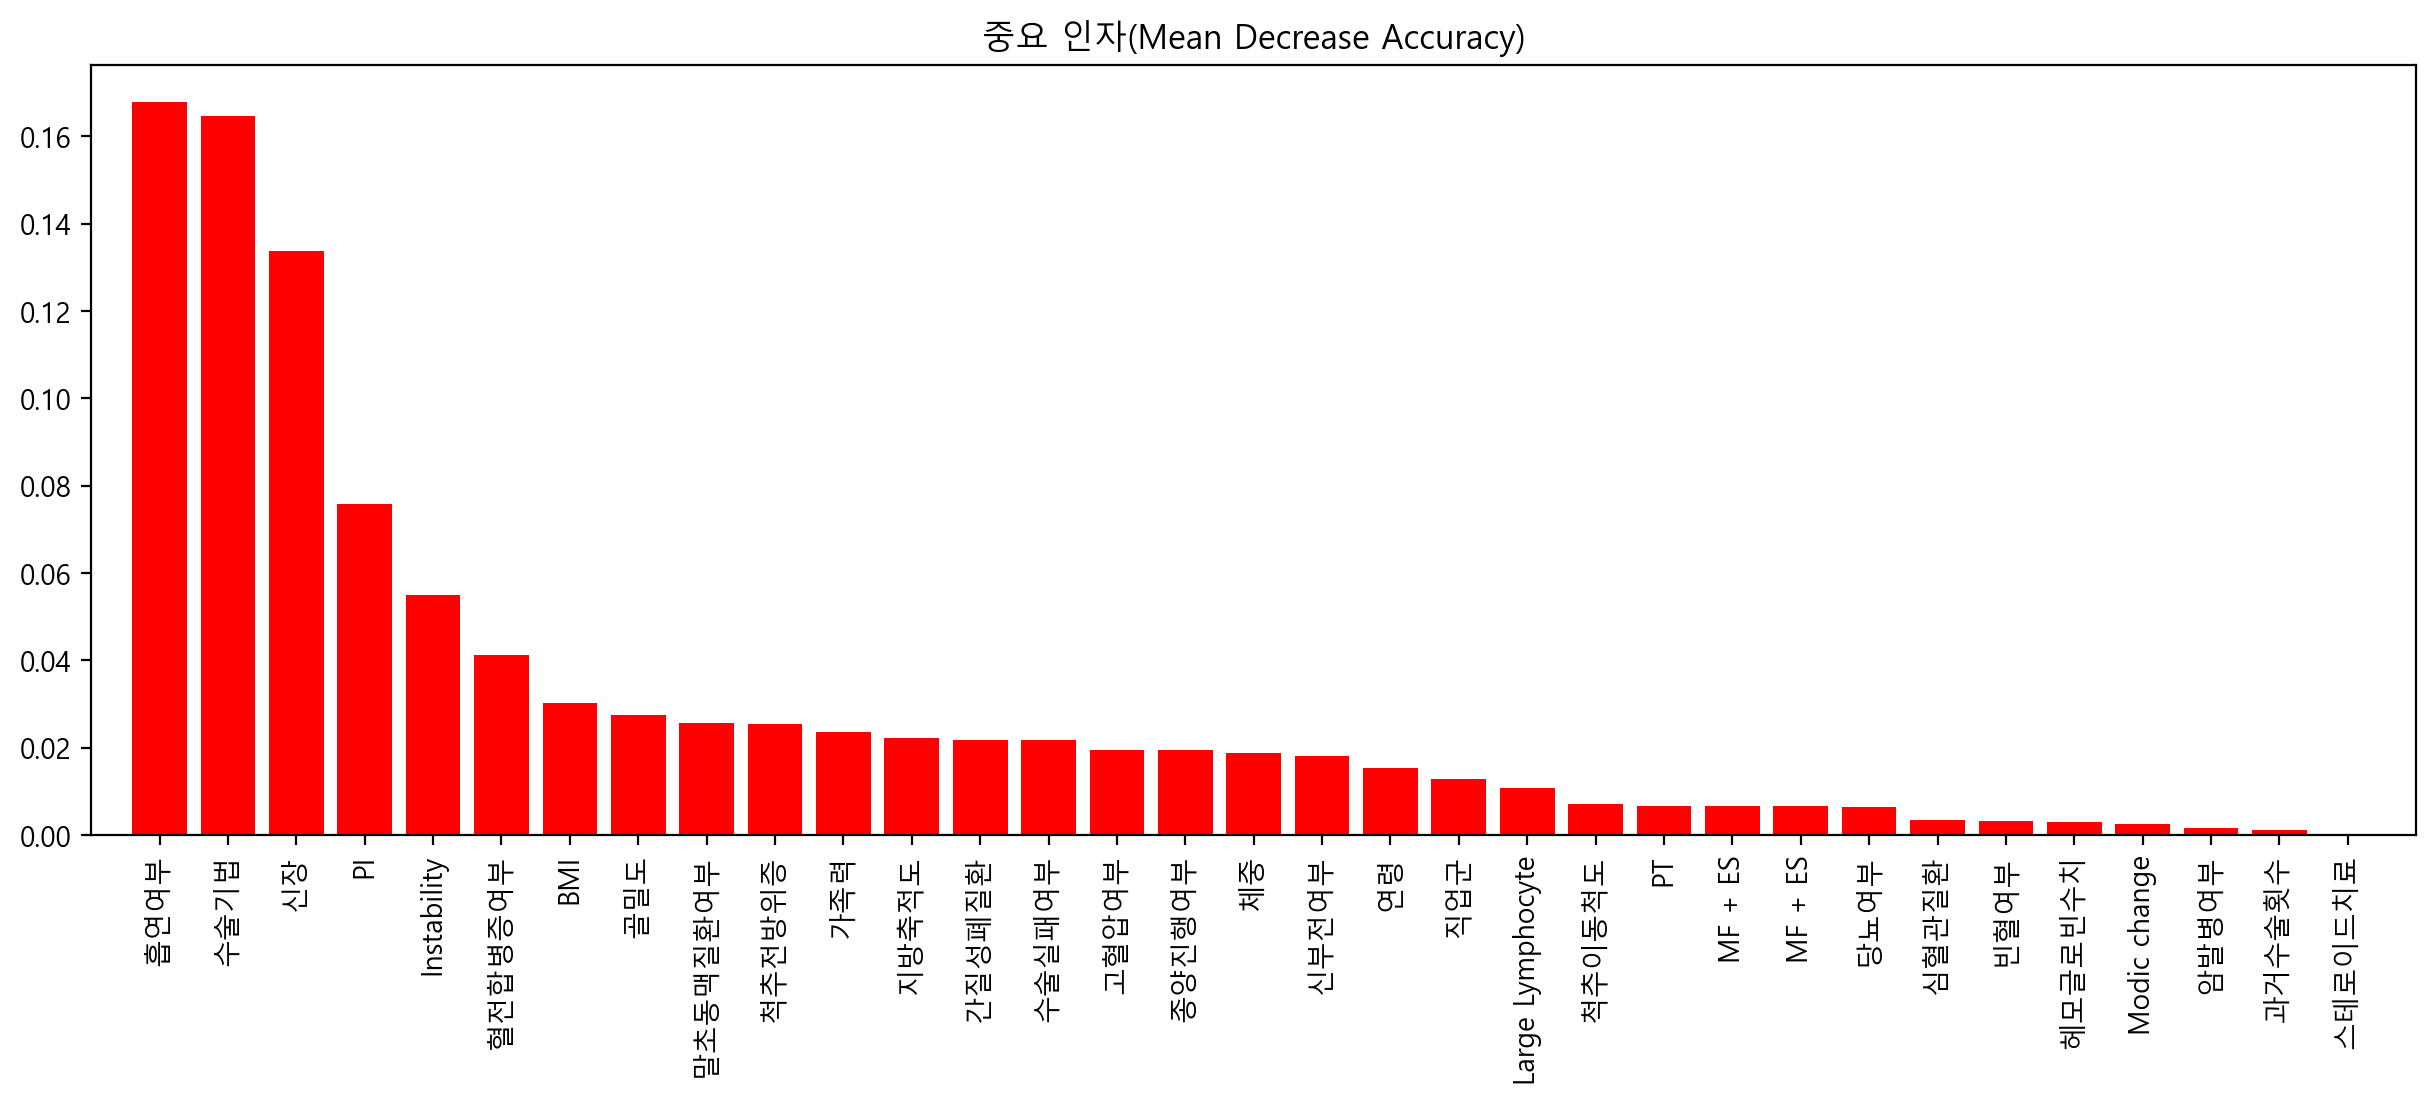

In [56]:
importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
feature_list = [X_train.columns[indices[f]] for f in range(X_train.shape[1])]
ff = np.array(feature_list)

print("중요인자 순서:")

for f in range(X_train.shape[1]):
    print("# %d.: %s" % (f + 1,  ff[indices[f]]))

plt.figure(figsize=(15,5))
plt.title("중요 인자(Mean Decrease Accuracy)")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), ff[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## 수술실패여부

### Random Forest (MSE)

In [57]:
# 설명변수(Input) 데이터 형성 
X = test[['체중', '신장', 'BMI', '연령', '흡연여부', '과거수술횟수', 'Large Lymphocyte', 'Location of herniation',
       '간질성폐질환', '혈전합병증여부', '고혈압여부', '당뇨여부', '말초동맥질환여부', '빈혈여부', '스테로이드치료',
       '신부전여부', '심혈관질환', '암발병여부', '종양진행여부', '헤모글로빈수치', '수술기법', '수술시간', '전방디스크높이(mm)', 
        '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT', 'Seg Angle(raw)',
       'Vaccum disc', '골밀도', '디스크위치', '척추이동척도', '척추전방위증']]
# 목표변수(Target) 데이터 형성 
Y = test[['수술실패여부']]

print(X.shape)
print(Y.shape)

(1860, 36)
(1860, 1)


In [58]:
# 데이터를 따로 분리하지 않고 예측 모델 생성 
X_train = X
Y_train = Y 

# MSE 모델,depth를 20으로, estimators를 100으로 설정 
model = RandomForestRegressor(criterion='mse',max_depth=20,min_samples_leaf=1, random_state=1000, n_estimators=100)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
print("Train Set Accuracy:",model.score(X_train, Y_train).round(2))
print('Train Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_pred).round(2))  
print('Train Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_pred).round(2))  
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)).round(2))  
print('Train Variance score: ', r2_score(Y_train,Y_pred).round(2))

C:\Users\YuJin\AppData\Local\Temp\ipykernel_10112\2014807339.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)
C:\Users\YuJin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Train Set Accuracy: 0.9
Train Mean Absolute Error: 0.03
Train Mean Squared Error: 0.01
Train Root Mean Squared Error: 0.07
Train Variance score:  0.9


중요인자 중요도순서:
# 1.: 스테로이드치료
# 2.: 당뇨여부
# 3.: 신부전여부
# 4.: 척추전방위증
# 5.: 심혈관질환
# 6.: 간질성폐질환
# 7.: 수술기법
# 8.: 디스크위치
# 9.: 수술시간
# 10.: 고혈압여부
# 11.: 헤모글로빈수치
# 12.: PI
# 13.: 지방축적도
# 14.: 암발병여부
# 15.: PT
# 16.: 말초동맥질환여부
# 17.: MF + ES
# 18.: Vaccum disc
# 19.: Seg Angle(raw)
# 20.: 혈전합병증여부
# 21.: 전방디스크높이(mm)
# 22.: 흡연여부
# 23.: 신장
# 24.: Location of herniation
# 25.: 연령
# 26.: 골밀도
# 27.: BMI
# 28.: Instability
# 29.: 척추이동척도
# 30.: 종양진행여부
# 31.: Large Lymphocyte
# 32.: 빈혈여부
# 33.: Modic change
# 34.: 후방디스크높이(mm)
# 35.: 체중
# 36.: 과거수술횟수


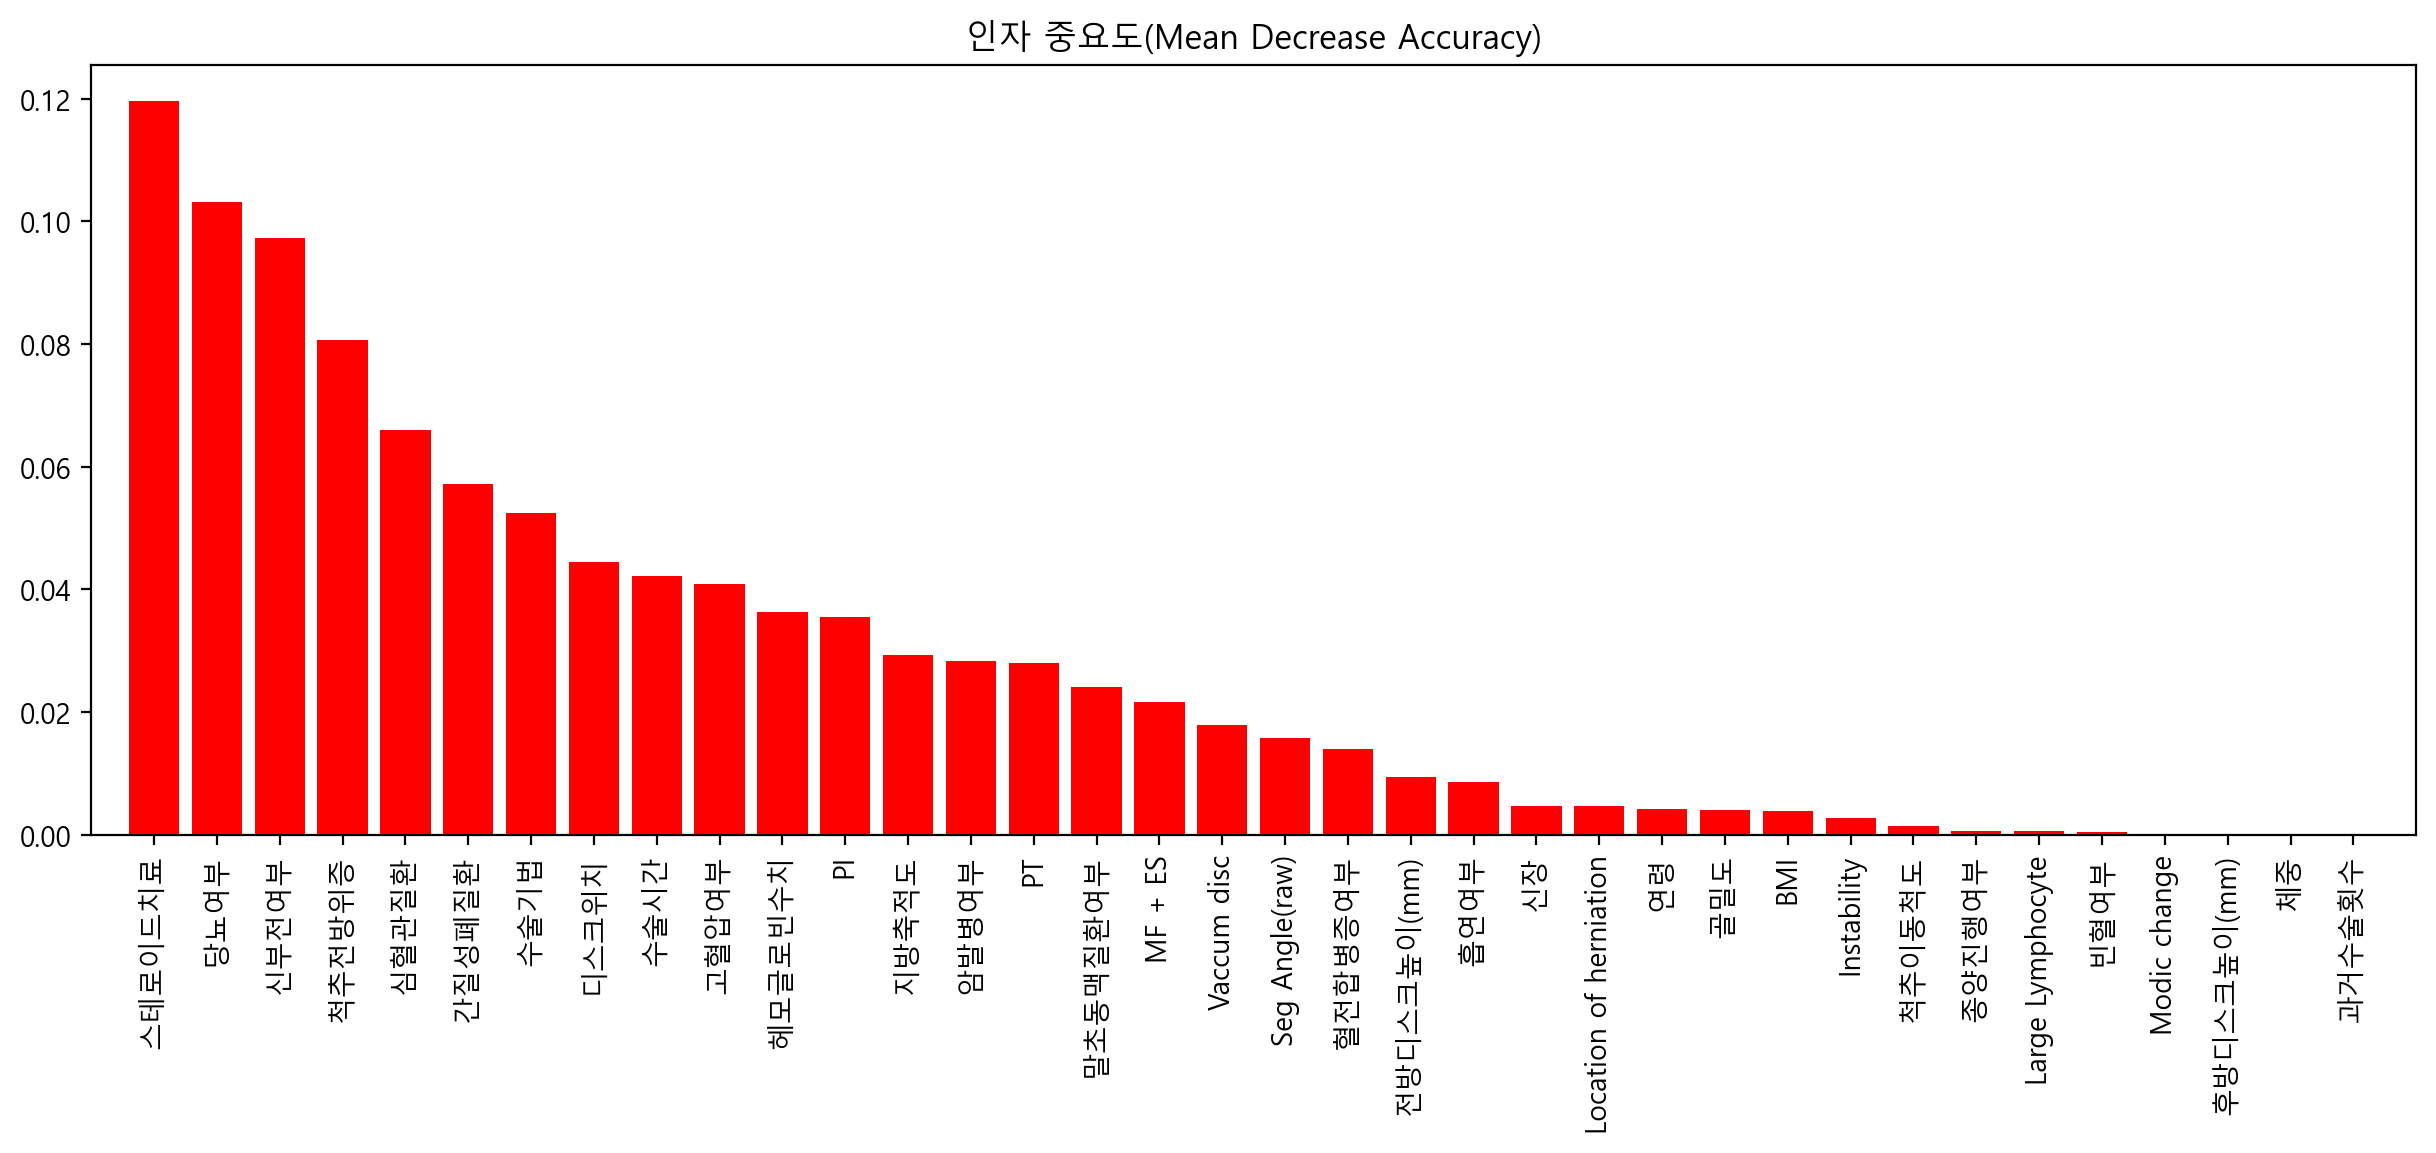

In [59]:
# 중요인자 순서도를 구하는 코드 
importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
feature_list = [X_train.columns[indices[f]] for f in range(X_train.shape[1])]
ff = np.array(feature_list)


print("중요인자 중요도순서:")

for f in range(X_train.shape[1]):
    print("# %d.: %s" % (f + 1,  ff[indices[f]]))


plt.figure(figsize=(15,5))
plt.title("인자 중요도(Mean Decrease Accuracy)")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), ff[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Gradient Boost Regressor

In [60]:
# 데이터를 따로 분리하지 않고 예측 모델 생성 
X_train = X
Y_train = Y

model = GradientBoostingRegressor(max_depth=3,min_samples_leaf=1, random_state=1000, n_estimators=100)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
print("Train Set Accuracy:",model.score(X_train, Y_train).round(2))
print('Train Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_pred).round(2))  
print('Train Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_pred).round(2))  
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)).round(2))  
print('Train Variance score: ', r2_score(Y_train,Y_pred).round(2))

C:\Users\YuJin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Set Accuracy: 0.6
Train Mean Absolute Error: 0.07
Train Mean Squared Error: 0.02
Train Root Mean Squared Error: 0.15
Train Variance score:  0.6


중요인자 중요도순서:
# 1.: 수술기법
# 2.: 고혈압여부
# 3.: 혈전합병증여부
# 4.: Instability
# 5.: 말초동맥질환여부
# 6.: 당뇨여부
# 7.: Large Lymphocyte
# 8.: Location of herniation
# 9.: 척추전방위증
# 10.: PI
# 11.: 종양진행여부
# 12.: 간질성폐질환
# 13.: 지방축적도
# 14.: Vaccum disc
# 15.: 골밀도
# 16.: 전방디스크높이(mm)
# 17.: PT
# 18.: Seg Angle(raw)
# 19.: 심혈관질환
# 20.: 신부전여부
# 21.: MF + ES
# 22.: 빈혈여부
# 23.: 스테로이드치료
# 24.: Modic change
# 25.: 신장
# 26.: 헤모글로빈수치
# 27.: 척추이동척도
# 28.: 암발병여부
# 29.: BMI
# 30.: 후방디스크높이(mm)
# 31.: 체중
# 32.: 수술시간
# 33.: 연령
# 34.: 과거수술횟수
# 35.: 디스크위치
# 36.: 흡연여부


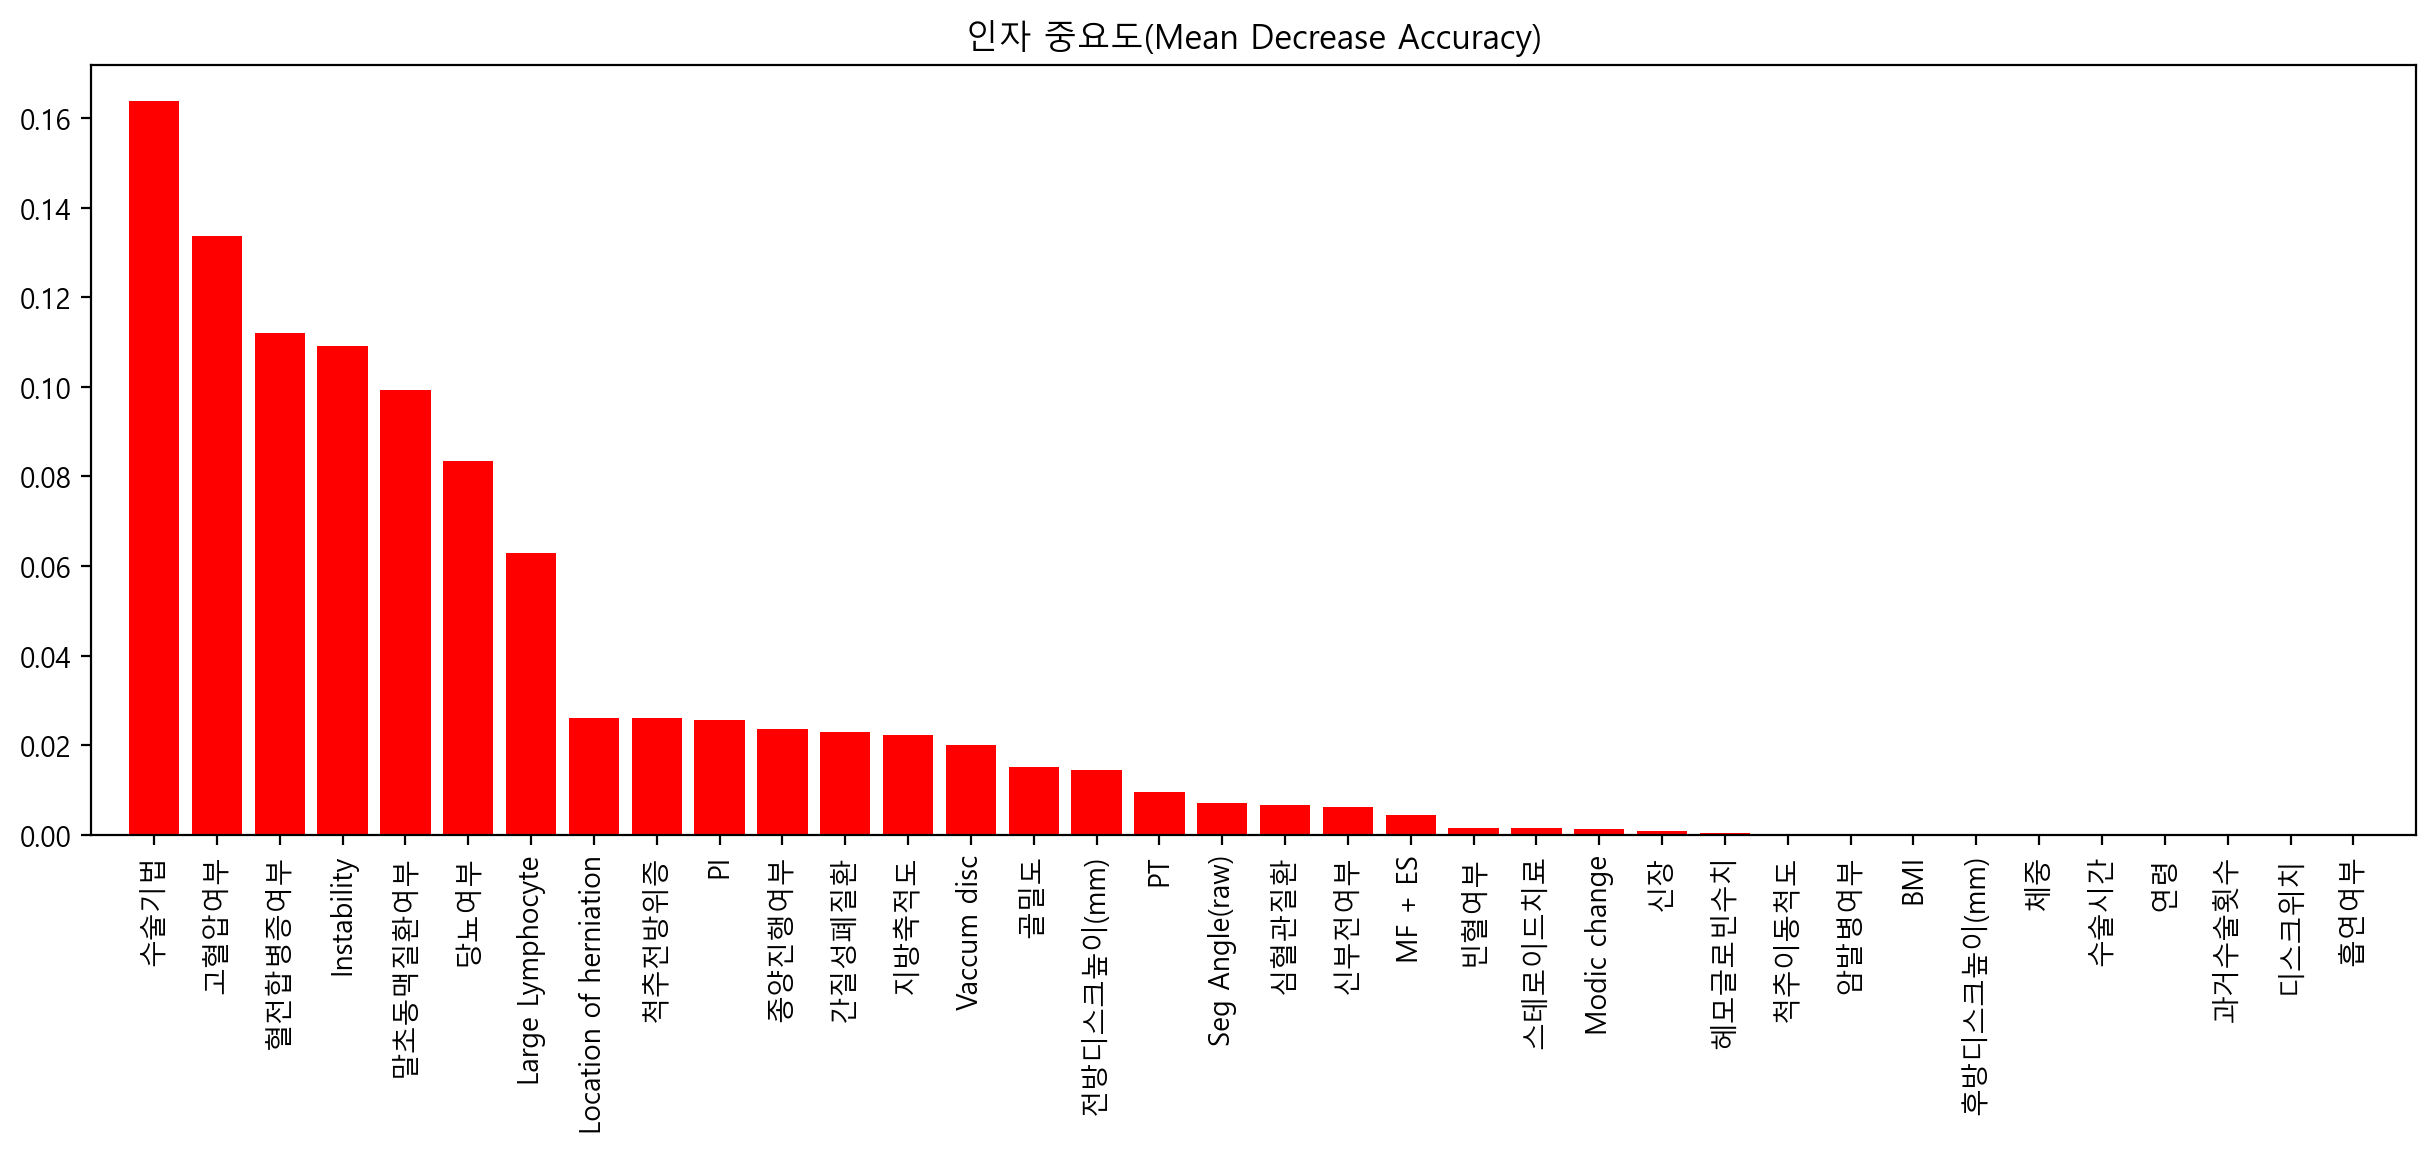

In [61]:
# 중요인자 순서도를 구하는 코드 
importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
feature_list = [X_train.columns[indices[f]] for f in range(X_train.shape[1])]
ff = np.array(feature_list)


print("중요인자 중요도순서:")

for f in range(X_train.shape[1]):
    print("# %d.: %s" % (f + 1,  ff[indices[f]]))


plt.figure(figsize=(15,5))
plt.title("인자 중요도(Mean Decrease Accuracy)")
plt.bar(range(X_train.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), ff[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### ExtraTreesRegressor

In [62]:
from sklearn.ensemble import ExtraTreesRegressor

In [63]:
# 데이터를 따로 분리하지 않고 예측 모델 생성 
X_train = X
Y_train = Y

model = ExtraTreesRegressor(max_depth=9,min_samples_leaf=1,n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)

print("Train Set Accuracy:",model.score(X_train, Y_train).round(2))
print('Train Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_pred).round(2))  
print('Train Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_pred).round(2))  
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)).round(2))  
print('Train Variance score: ', r2_score(Y_train,Y_pred).round(2))

C:\Users\YuJin\AppData\Local\Temp\ipykernel_10112\4112231586.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


Train Set Accuracy: 0.55
Train Mean Absolute Error: 0.07
Train Mean Squared Error: 0.03
Train Root Mean Squared Error: 0.16
Train Variance score:  0.55


중요인자 순서:
# 1.: 간질성폐질환
# 2.: Modic change
# 3.: 고혈압여부
# 4.: 말초동맥질환여부
# 5.: 신부전여부
# 6.: 당뇨여부
# 7.: 척추전방위증
# 8.: 심혈관질환
# 9.: 수술기법
# 10.: 스테로이드치료
# 11.: Seg Angle(raw)
# 12.: 골밀도
# 13.: 혈전합병증여부
# 14.: MF + ES
# 15.: 척추이동척도
# 16.: PT
# 17.: BMI
# 18.: Location of herniation
# 19.: Instability
# 20.: 지방축적도
# 21.: PI
# 22.: 암발병여부
# 23.: 연령
# 24.: 흡연여부
# 25.: Large Lymphocyte
# 26.: 과거수술횟수
# 27.: 수술시간
# 28.: 헤모글로빈수치
# 29.: 체중
# 30.: 후방디스크높이(mm)
# 31.: 종양진행여부
# 32.: 빈혈여부
# 33.: 신장
# 34.: 전방디스크높이(mm)
# 35.: 디스크위치
# 36.: Vaccum disc


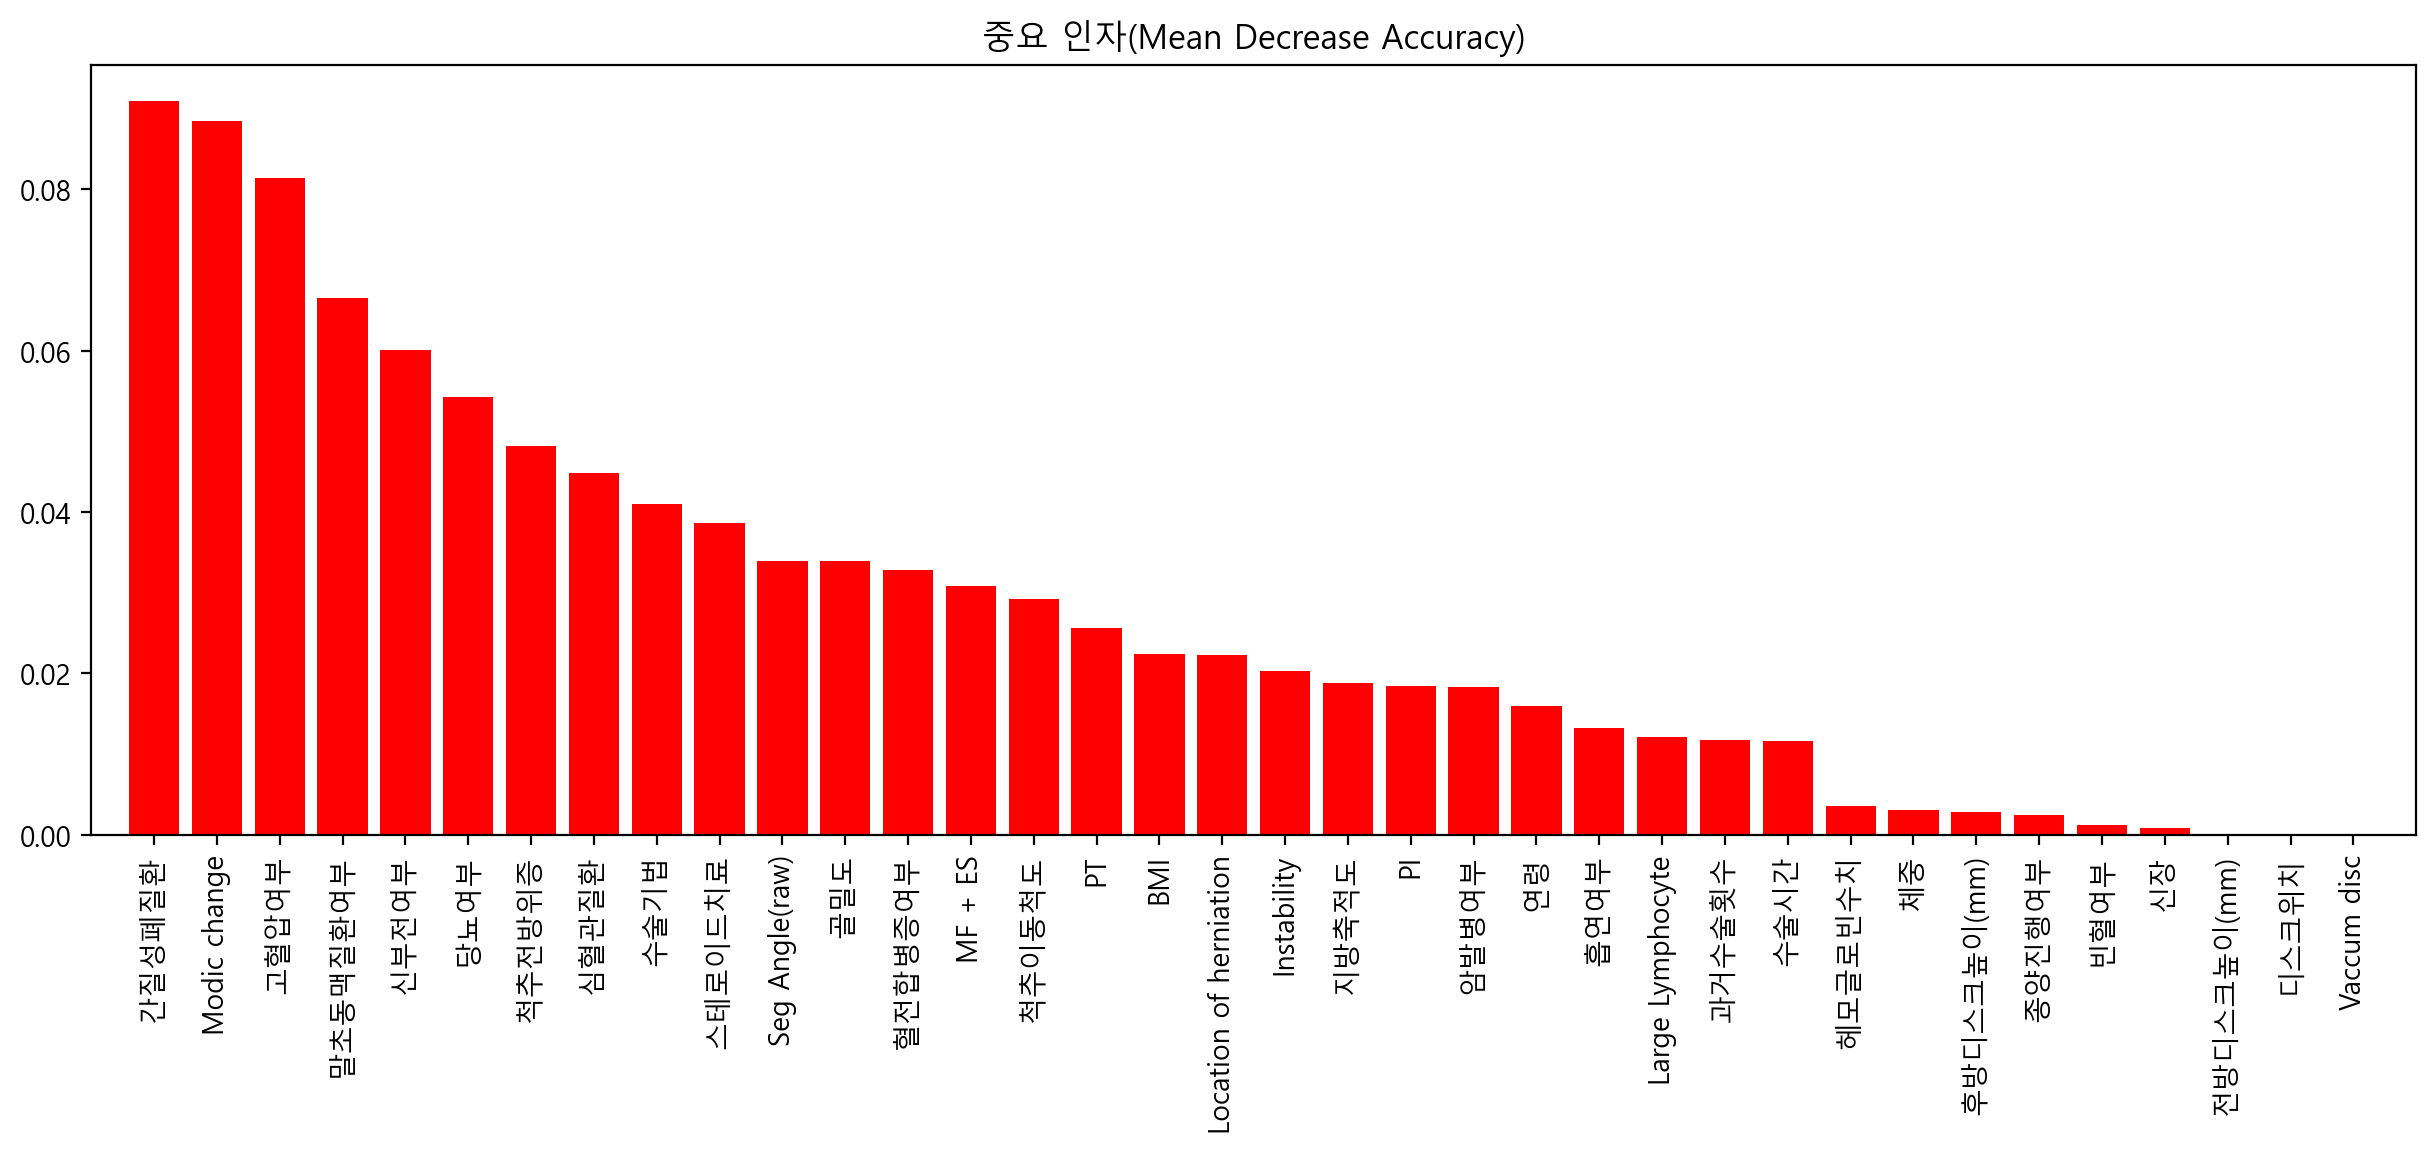

In [64]:
importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
feature_list = [X_train.columns[indices[f]] for f in range(X_train.shape[1])]
ff = np.array(feature_list)

print("중요인자 순서:")

for f in range(X_train.shape[1]):
    print("# %d.: %s" % (f + 1,  ff[indices[f]]))

plt.figure(figsize=(15,5))
plt.title("중요 인자(Mean Decrease Accuracy)")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), ff[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()